# Scientific Plotting Guidelines for Research

This notebook demonstrates best practices for creating publication-quality figures



## 📋 Quick Reference Guidelines

### Figure Dimensions (Critical for Consistency)
- **4 inches** for single-panel figures (half-page width)
- **8 inches** for multi-panel figures (full-page width)
- Units are in inches for matplotlib by default
- **Why this matters**: Consistent figure widths ensure uniform font sizes across your manuscript

### Typography Standards
- **8-10 pt** base font size for consistency with journal text
- **LaTeX rendering** enabled when available (automatic fallback to standard fonts)

### Color Conventions
- **Black** (`'black'`) for ground truth or reference data
- **Primary colors**: Red (`'red'`) and Blue (`'blue'`) for comparisons
- **Accessibility-conscious** choices for colorblind readers

### Contour Plot Standards
- **Colormap**: `'bwr'` (blue-white-red) with white representing zero
- **Levels**: 100+ contour levels for smooth gradients (default is only 20)
- **High DPI**: 600+ DPI for publication-quality raster images

### Legend and Layout Best Practices
- **Frameless legends**: `plt.legend(frameon=False)` for clean appearance
- **Tight layout**: `bbox_inches='tight'` when saving removes excess whitespace
- **Consistent spacing** and aspect ratios across related figures

### File Format Strategy
| Plot Type | Recommended Format | DPI | Reason |
|-----------|-------------------|-----|--------|
| Line plots | PDF, EPS, SVG | N/A | Vector graphics scale without quality loss |
| Contour plots | PNG, JPG | 600+ | Raster better for complex color gradients |
| Presentations | PNG | 300+ | Good quality-to-size ratio |

---

## 🛠️ Configuration Setup
The `plot_config.py` module provides standardized parameters for consistent formatting


In [1]:
# Import required libraries 
import os, sys 
import numpy as np                   
import matplotlib.pyplot as plt       
import matplotlib.cm as cm           

# Navigate to parent directory to access plot_config.py
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)


# Load Plotting Configuration
from src.plot_config import (
    params,           # Matplotlib parameters (fonts, sizes, etc.)
    contourLevels,    # Number of contour levels (100 for smooth gradients)
    colormap,         # Standard colormap ('bwr' - blue-white-red)
    savefig_format,   # Default save format ('pdf' for vector graphics)
    SAVE_DIR,         # Directory for saving figures ('' = current directory)
)

# Apply the parameters to matplotlib
plt.rcParams.update(params)

✓ LaTeX found at: /Library/TeX/texbin/latex
🎨 Scientific plotting configuration loaded
   LaTeX support: ✓ Enabled
   Default save format: png
   Contour levels: 100
   Colormap: bwr


## 📈 Line Plot Example

🎯 Creating line plot example: python_sample_line


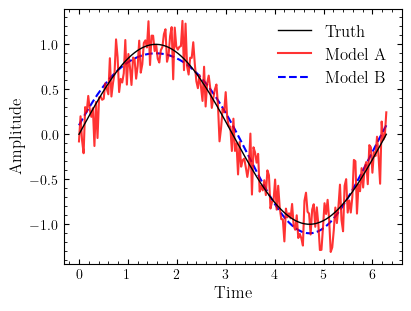

In [2]:

# Define filename for sa
figname = 'python_sample_line'

print(f"🎯 Creating line plot example: {figname}")

# Create single panel figure (4 inches wide)
# - 4 inches: Half-page width in most journals
fig, axes = plt.subplots(figsize=(4, 3), layout='compressed')

# Ensure clean white background (important for publications)
fig.patch.set_facecolor('white')


# 1. Generate sample data
x = np.linspace(0, 2*np.pi, 200)
y_truth = np.sin(x)                                    # "Ground truth" observations
y_emulator1 = np.sin(x) + 0.2*np.random.randn(len(x)) # Model 1: noisy prediction
y_emulator2 = np.sin(x) + 0.1*np.cos(2*x)            # Model 2: systematic bias

# 2. Plot data
axes.plot(x, y_truth, color='black', linewidth=1, label='Truth', zorder=3)          # Ensure truth is plotted on top
axes.plot(x, y_emulator1, color='red', linewidth=1.5, label='Model A', alpha=0.8, zorder=2)
axes.plot(x, y_emulator2, color='blue', linewidth=1.5, label='Model B', linestyle='--', zorder=1)

# 3. Labels, legend, and title
axes.set_xlabel('Time')  # Always include units!
axes.set_ylabel('Amplitude')
axes.legend(frameon=False, loc='best') # Legend box should be frameless
 
# 4. Save and show
filename = f"{SAVE_DIR}{figname}.svg"
plt.savefig(filename, format='svg', bbox_inches='tight')
plt.show()

## 🌊 Multi-Panel Contour Plot Example

- **Multi-panel layout**: 8-inch width for full-page journal figures
- **BWR colormap**: Blue-white-red with white representing zero (physical intuition)
- **High contour levels**: 100+ levels for smooth gradients (vs. default 20)
- **Symmetric scaling**: Color scales centered on zero for physical meaning
- **Latex annotations**: LaTeX-rendered mathematical symbols and units


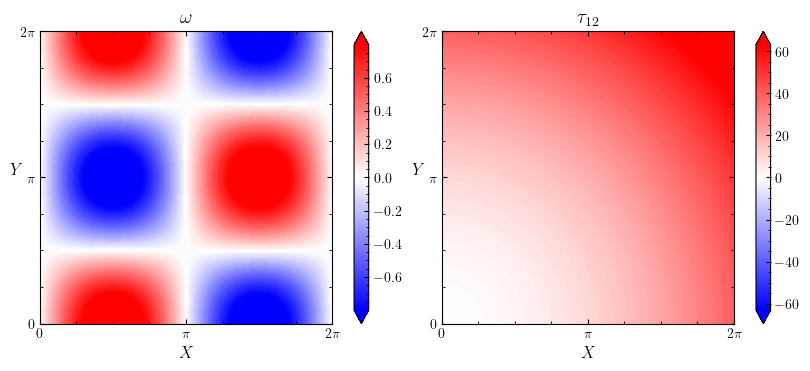

In [3]:
figname = 'python_sample_contour'

# Create single panel figure (8 inches wide)
# - 8 inches: Full-page width in most journals
fig, axes = plt.subplots(1, 2, figsize=(8, 4), layout='compressed')  
# 1 row, 2 columns

# 1. Generate sample data
Nx_grid, Ny_grid = 128, 128
x_min, x_max = 0.0, 2*np.pi
y_min, y_max = 0.0, 2*np.pi

x = np.linspace(x_min, x_max, Nx_grid)
y = np.linspace(y_min, y_max, Ny_grid)
X, Y = np.meshgrid(x, y)

# Two different example functions
Z1 = np.sin(X) * np.cos(Y)
Z2 = X**2 + Y**2

# 2. Plot Panel # 1
vmax = 0.8 * np.max(np.abs(Z1))
vmin = -vmax
contourf_1 = axes[0].contourf(X, Y, Z1, contourLevels, 
                              cmap=colormap, vmax=vmax, vmin=vmin)
axes[0].set_aspect('equal', 'box')
axes[0].set_title(r'$\omega$')
axes[0].set_xlabel(r'$X$')
axes[0].set_ylabel(r'$Y$', rotation=0)
axes[0].set_xticks([0, np.pi, 2*np.pi], labels=[r'$0$', r'$\pi$', r'$2\pi$'])
axes[0].set_yticks([0, np.pi, 2*np.pi], labels=[r'$0$', r'$\pi$', r'$2\pi$'])

# Colorbar
sm = cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=vmin, vmax=vmax)
cbar = fig.colorbar(sm, ax=axes[0], extend='both', )
# cbar.outline.set_visible(False)

# 3. Plot Panel # 2
vmax = 0.8 * np.max(np.abs(Z2))
vmin = -vmax
contourf_2 = axes[1].contourf(X, Y, Z2, contourLevels, 
                              cmap=colormap, vmax=vmax, vmin=vmin)
axes[1].set_aspect('equal', 'box')
axes[1].set_title(r'$\tau_{12}$')
axes[1].set_xlabel(r'$X$')
axes[1].set_ylabel(r'$Y$', rotation=0)
axes[1].set_xticks([0, np.pi, 2*np.pi], labels=[r'$0$', r'$\pi$', r'$2\pi$'])
axes[1].set_yticks([0, np.pi, 2*np.pi], labels=[r'$0$', r'$\pi$', r'$2\pi$'])

# Colorbar
sm = cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=vmin, vmax=vmax)
cbar = fig.colorbar(sm, ax=axes[1], extend='both')
# cbar.outline.set_visible(False)

# 4. Save and show
plt.savefig(SAVE_DIR + figname + '.' + savefig_format, 
            dpi=600, format=savefig_format, bbox_inches='tight')
plt.show()